## Detecting customers who are likely to Churn
(Telecom Dataset Churn Analysis)

In this project, the goal is to identify customers churn, that is, customers most likely to cancel subscription to a fictitious Telecom company. That is a really interesting problem, because if you could predict in advance which customers are at risk of leaving, you could reduce customer retention efforts by directing them toward such customers, providing adequate intervention to encourage them to stay and minimize customer exit.

The dataset for this exercise relates features of account and usage for churn and non churn clients. The Telecom dataset was obtained from Kaggle. That is a supervised classification problem and Machine Learning algorithms will be used for the development of predictive models and evaluation of accuracy and performance. It seeks to find the most appropriate model for the business.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer


## Data preparation

In [2]:
#load the dataset 
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [3]:
#get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
#getting descriptive statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


### there are no missing values

In [6]:
# Encode categorical variables
df_encoded= pd.get_dummies(df)
print(df_encoded)

      account length  area code  number vmail messages  total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
3328             192        415                     36              156.2   
3329              68        415                      0              231.1   
3330              28        510                      0              180.8   
3331             184        510                      0              213.8   
3332              74        415                     25              234.4   

      total day calls  total day charge  total eve minutes  total eve calls

## Exploratory Data Analysis

### What is the distribution of subscribers by target variable churn?
### What is the percentage of loyal subscribers?

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

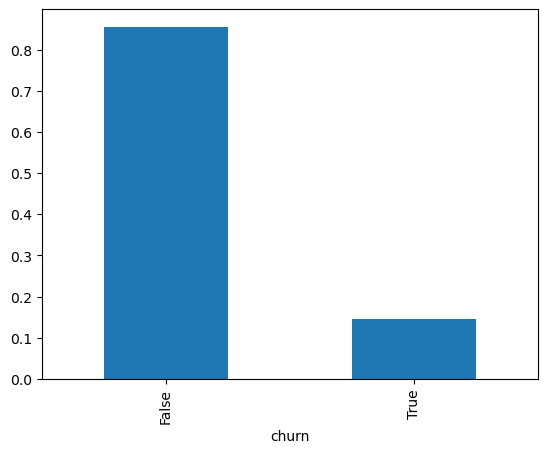

In [7]:
df['churn'].value_counts(normalize=True).plot(kind = 'bar')
df['churn'].value_counts(normalize=True)


### 85.5% are loyal subscribers

### exploring the distribution of the target variable 

<Axes: xlabel='churn', ylabel='count'>

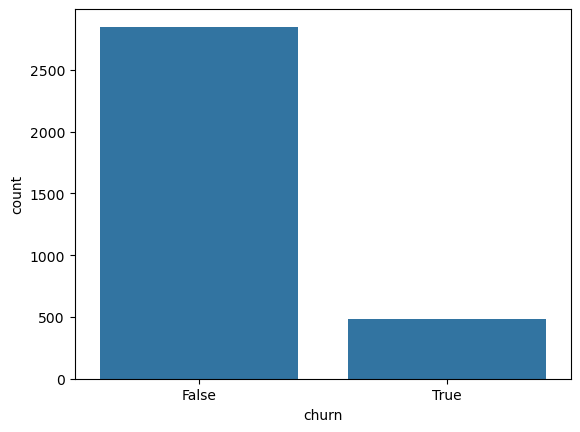

In [8]:
# Explore the distribution of the target variable (churn)
sns.countplot(x='churn', data=df)

### Relationship between the number of calls to the call center and Churn

<Axes: xlabel='count', ylabel='customer service calls'>

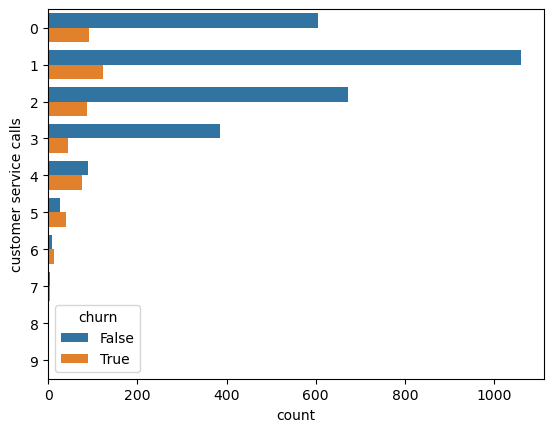

In [9]:
sns.countplot(y='customer service calls', hue='churn', data=df)

From the plot, it's evident that most customers have made fewer customer service calls, with a decreasing number of customers as the count of calls increases

### Ditribution of churned and non churned customers

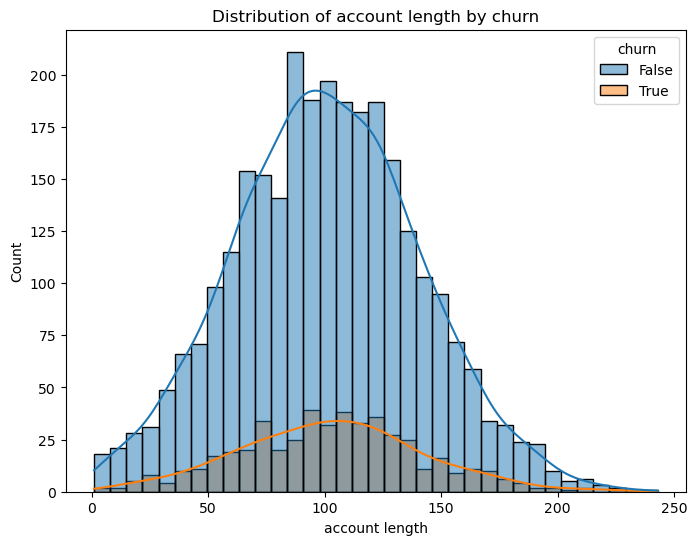

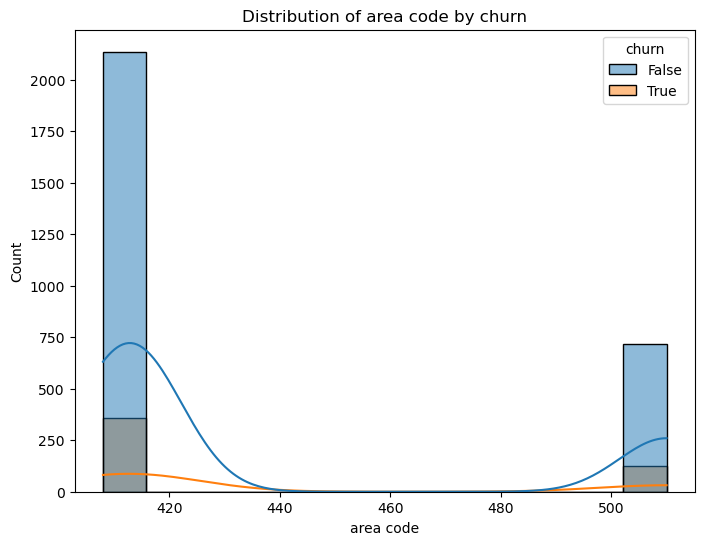

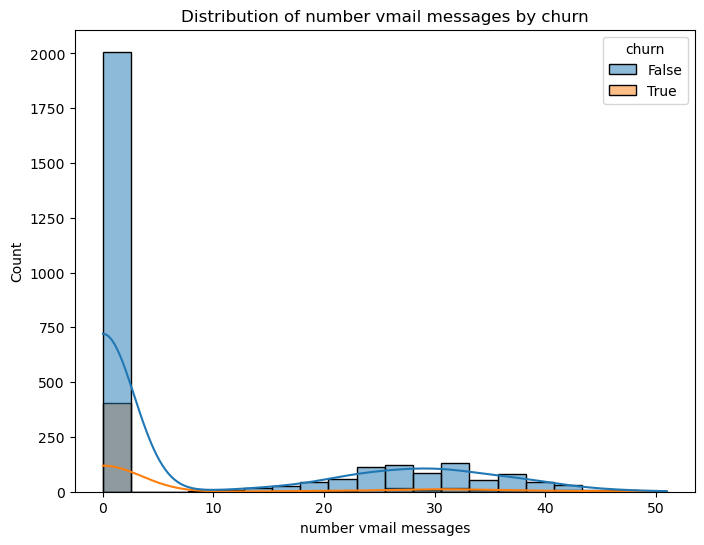

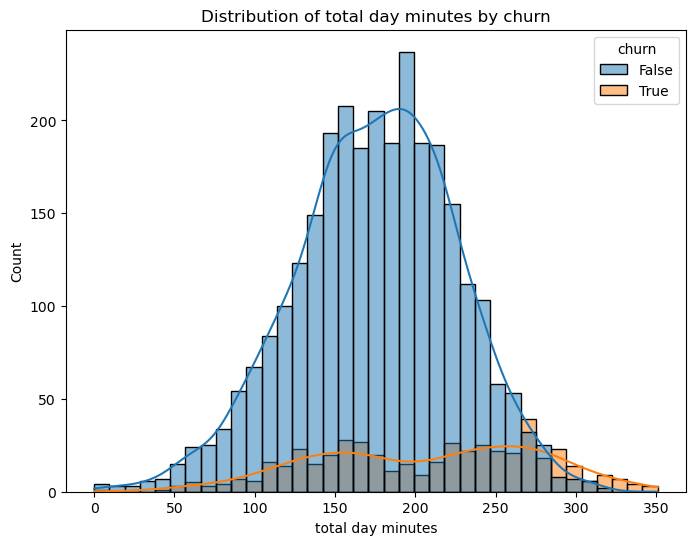

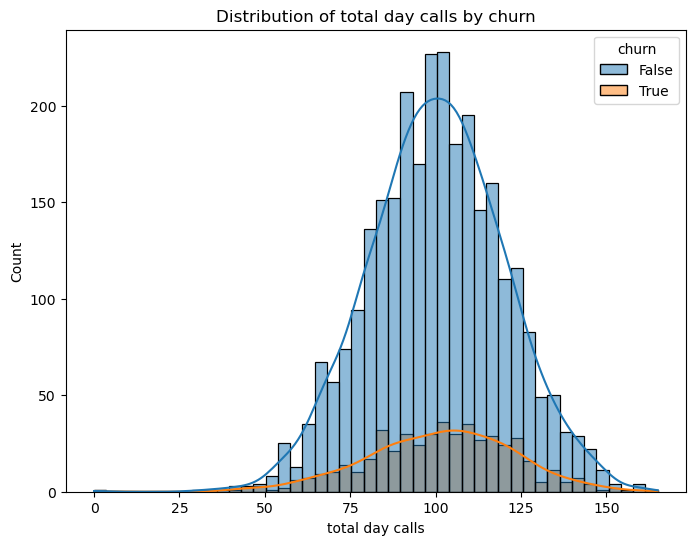

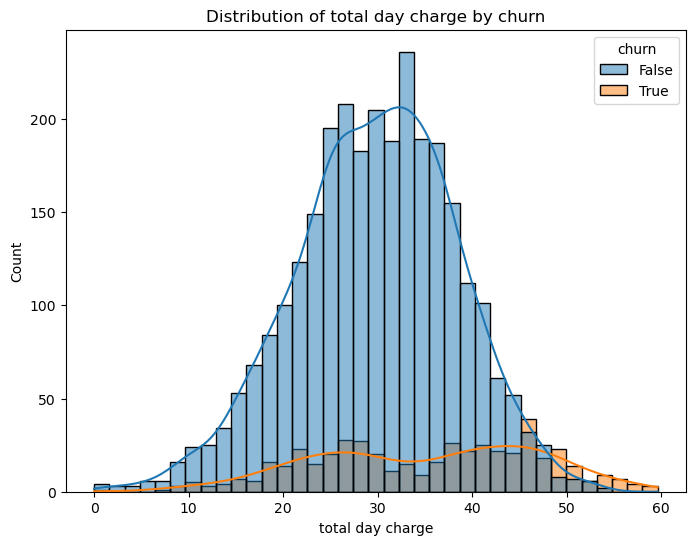

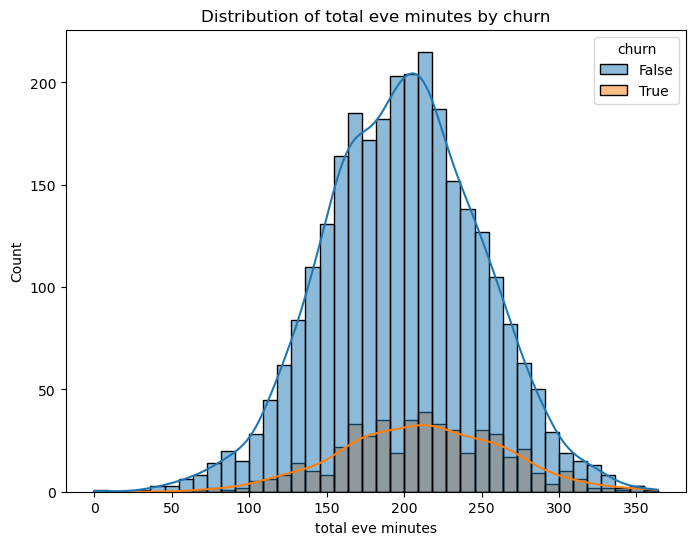

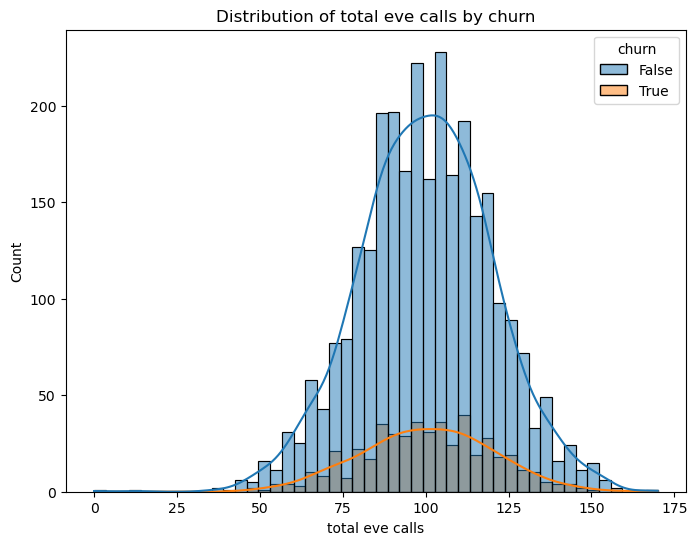

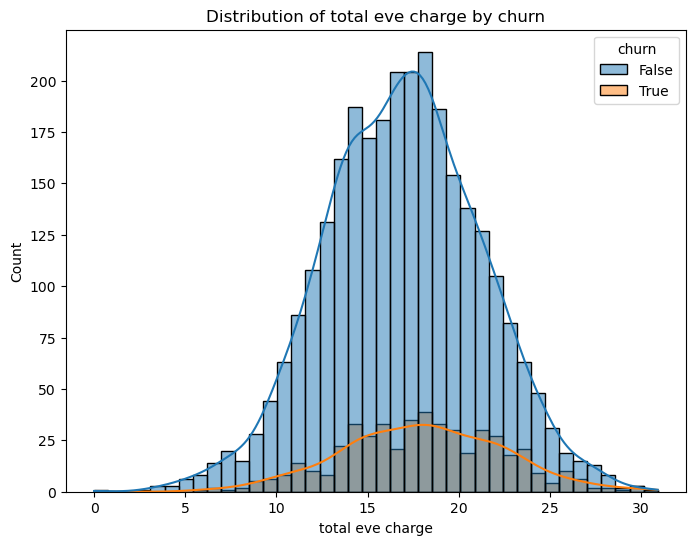

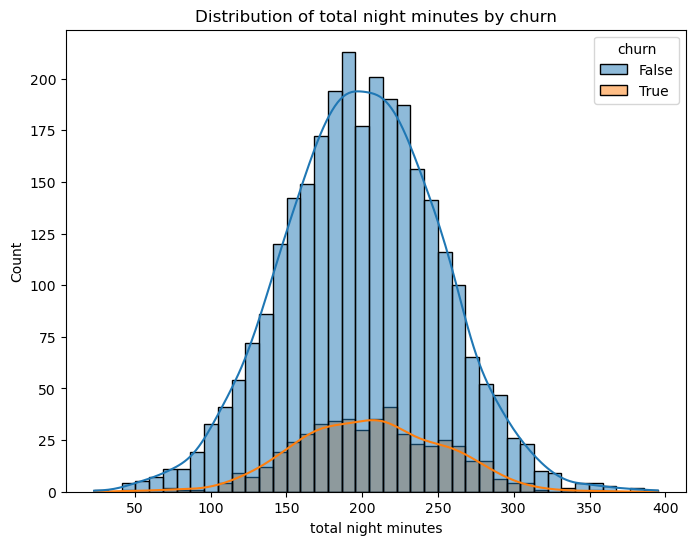

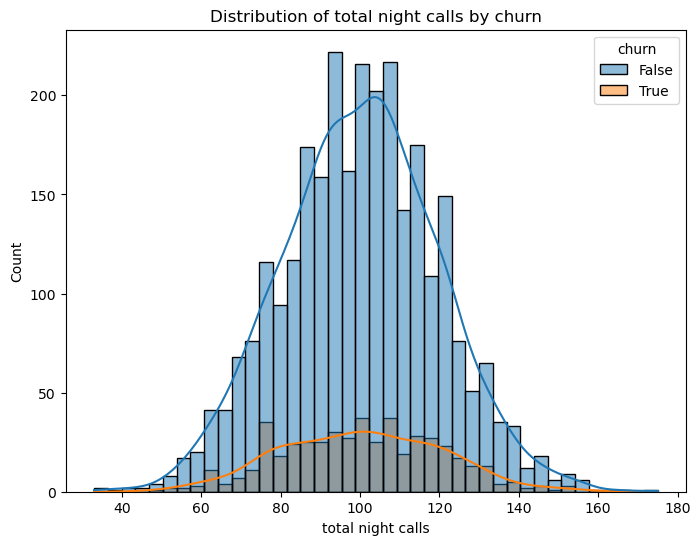

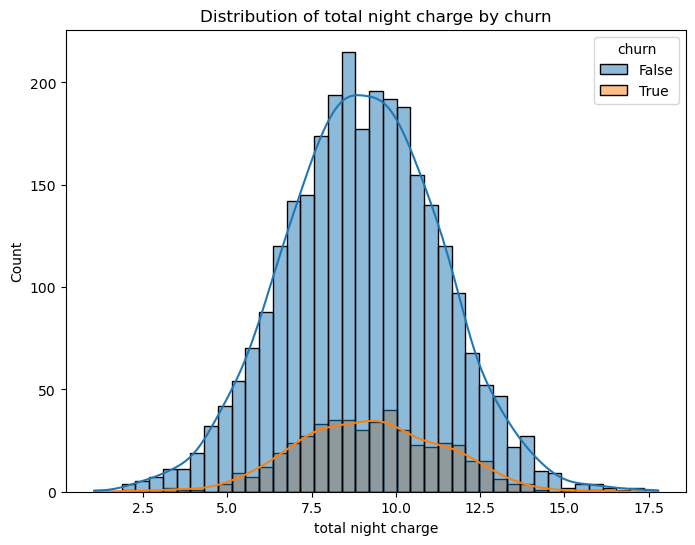

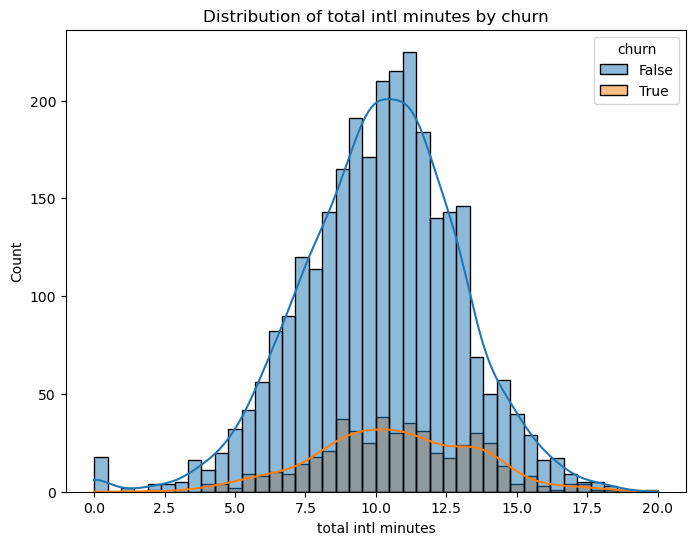

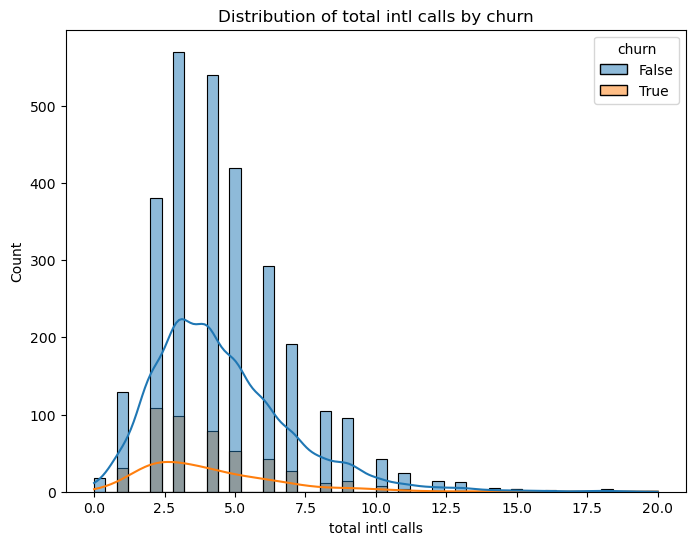

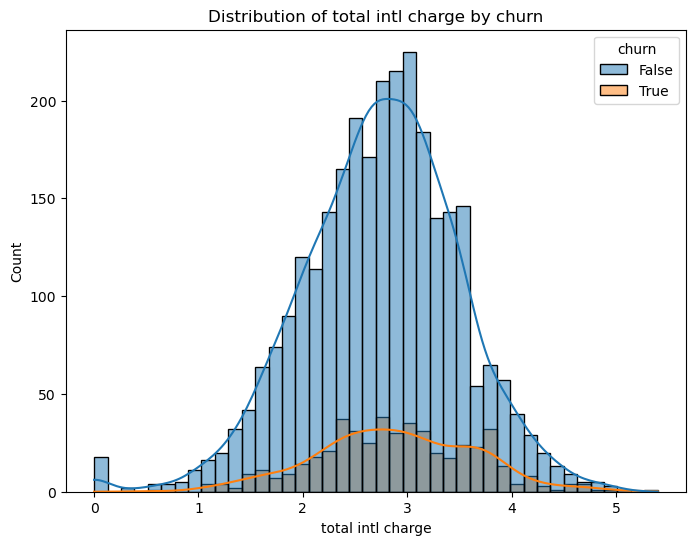

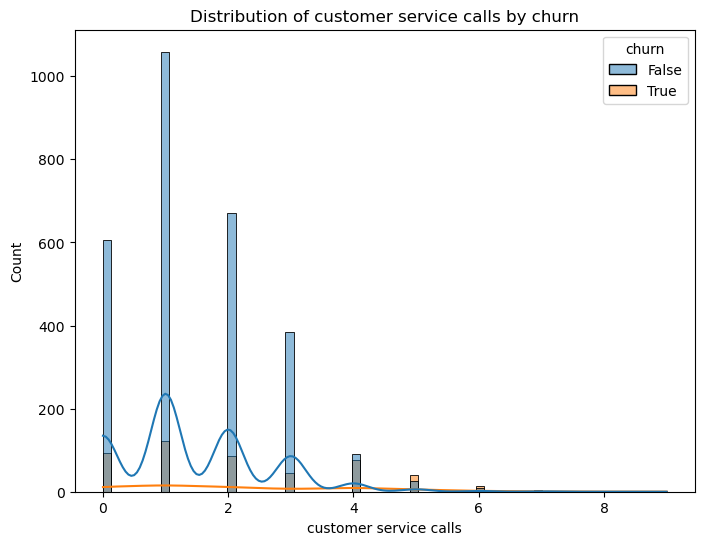

In [10]:

# Plot distribution of numerical variables for churned and non-churned customers
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='churn', kde=True)
    plt.title(f'Distribution of {col} by churn')
    plt.show()

### Counts of churned and non churned customers

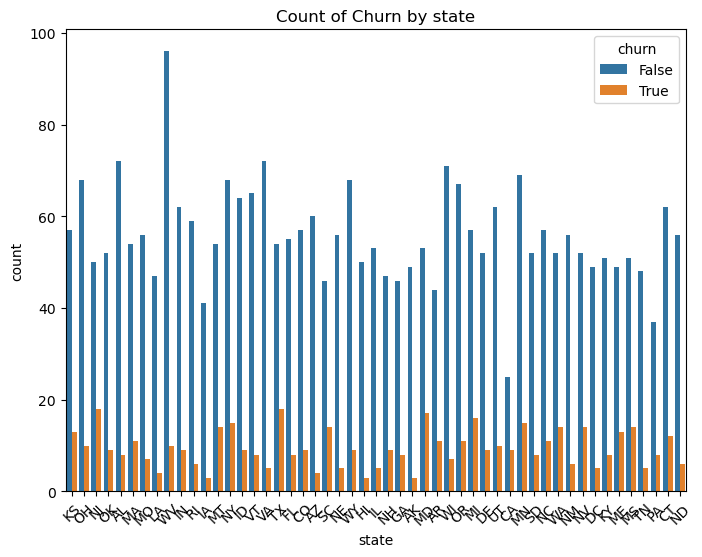

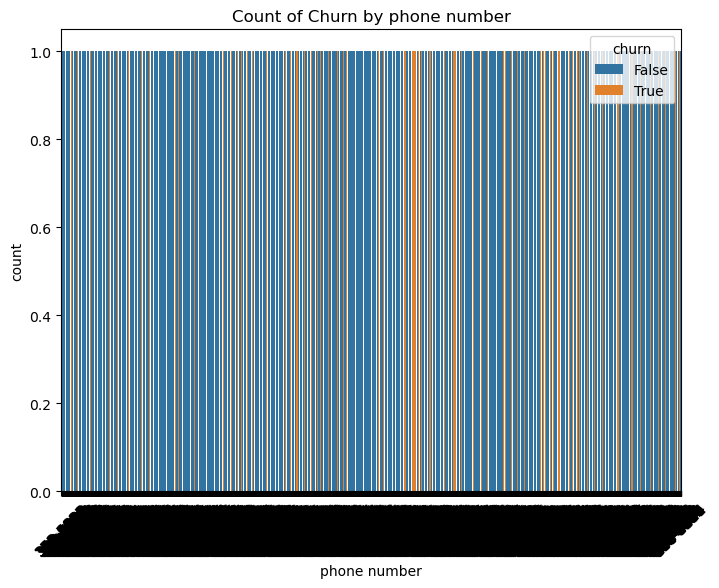

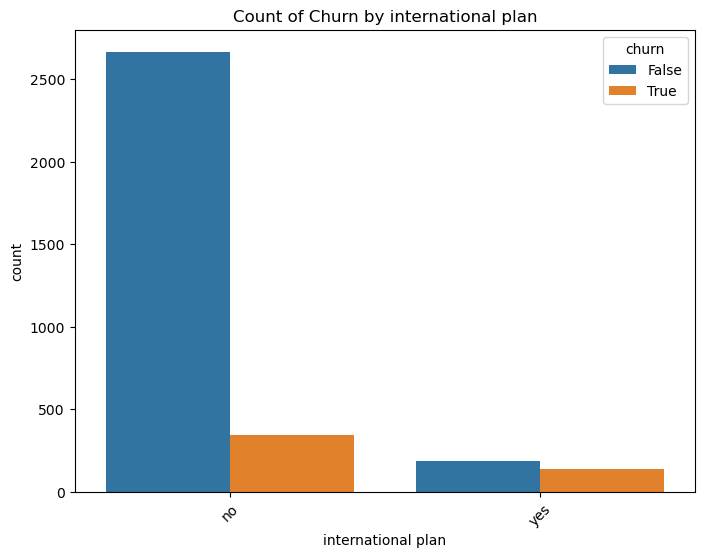

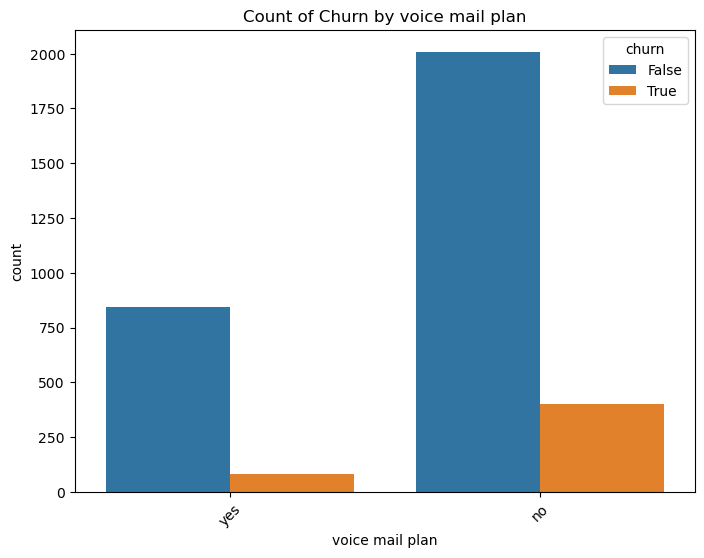

In [11]:
# Plot count of churned vs non-churned customers by categorical variables
catg_cols = df.select_dtypes(include=['object']).columns
for col in catg_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f'Count of Churn by {col}')
    plt.xticks(rotation=45)
    plt.show()

## MODEL DEVELOPMENT AND EVALUATION 

### Split data into train and test sets

In [ ]:
# Split data into train and test sets
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training a random forest classfier to make predictions 

In [ ]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

### Model evaluation

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8995502248875562
Precision: 1.0
Recall: 0.33663366336633666
F1 Score: 0.5037037037037037


 The model achieved a high accuracy of approximately 89.96%, indicating that the majority of predictions were correct. 
 The model obtained the  precision  of 1.0 which  suggests that when the model predicted a positive outcome, it was always correct.
The recall score of around 33.66% means that the model identified only about a third of all actual positive cases.
 The F1 score, which combines precision and recall, is around 50.37%, indicating a moderate balance between the two metrics.
 we therefore need to improve the  model since recall is too low which indicates that it might miss positive cases   


## Hyperparameter tuning using GridSearchCV

In [ ]:


# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [ ]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### Using the best model for prediction and evaluation

In [ ]:
# Use the best model for predictions and evaluation
y_pred_best = best_model.predict(X_test)

In [ ]:
# Evaluate the best model
classification_rep = classification_report(y_test, y_pred_best)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       566
        True       1.00      0.39      0.56       101

    accuracy                           0.91       667
   macro avg       0.95      0.69      0.75       667
weighted avg       0.92      0.91      0.89       667



The refined model achieved high precision for both churn and non-churn classes, indicating that the majority of predictions were correct. The recall for the churn class is relatively low, indicating that the model struggles to correctly identify churn instances. This suggests that the model may be biased towards predicting non-churn instances, leading to imbalanced performance across classes.We need to apply feature engineering patterns to capture the underlying patterns in the Dataset.

In [ ]:
df.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

## Feature engineering to improve recall for churn

In [ ]:

# creating  a new feature for  total usage
df['total_usage'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

In [ ]:
# Checking the correlation between the total usage  and churn
print(df[['total_usage', 'churn']].corr())



             total_usage     churn
total_usage     1.000000  0.198607
churn           0.198607  1.000000


In [ ]:
# Use the new feature for model training
X_engineered = df_encoded.drop('churn', axis=1)
X_engineered['total_usage'] = df['total_usage']
y_engineered = df_encoded['churn']



In [ ]:
# Split data into train and test sets
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engineered, y_engineered, test_size=0.2, random_state=42)

# Train a new model using the engineered features
best_model.fit(X_train_eng, y_train_eng)



RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [ ]:
# Make predictions
y_pred_eng = best_model.predict(X_test_eng)



In [ ]:
# Evaluate the model
classification_rep_eng = classification_report(y_test_eng, y_pred_eng)
print("Classification Report after feature engineering:")
print(classification_rep_eng)

Classification Report after feature engineering:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       566
        True       1.00      0.42      0.59       101

    accuracy                           0.91       667
   macro avg       0.95      0.71      0.77       667
weighted avg       0.92      0.91      0.90       667



#### For the class labeled as True, the recall is 0.39, indicating that only 39% of the actual churn instances were correctly identified by the model.addressing the low recall for the class labeled as True we need to to perform  further feature engineering to improve model accuracy.

In [ ]:


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define recall as the scoring metric
scorer = make_scorer(recall_score)

# Perform grid search with cross-validation
grid_search_recall = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring=scorer)
grid_search_recall.fit(X_train_eng, y_train_eng)

# Get the best parameters and model
best_params_recall = grid_search_recall.best_params_
best_model_recall = grid_search_recall.best_estimator_

print("Best Parameters after tuning for recall:", best_params_recall)

# Use the best model for predictions and evaluation
y_pred_recall = best_model_recall.predict(X_test_eng)

# Evaluate the model
classification_rep_recall = classification_report(y_test_eng, y_pred_recall)
print("Classification Report after hyperparameter tuning for recall:")
print(classification_rep_recall)


Best Parameters after tuning for recall: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report after hyperparameter tuning for recall:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       566
        True       1.00      0.46      0.63       101

    accuracy                           0.92       667
   macro avg       0.96      0.73      0.79       667
weighted avg       0.92      0.92      0.90       667



Precision: For the class labeled as False, the precision remains the same as before hyperparameter tuning, indicating that 91% of the customers predicted to not churn actually did not churn. For the class labeled as True, the precision remains perfect at 100%, meaning that all customers predicted to churn actually did churn.
Recall: After hyperparameter tuning, the recall for the class labeled as False remains perfect at 100%, indicating that all actual instances of not churning were correctly identified by the model. However, the recall for the class labeled as True has improved to 46%, compared to the previous recall of 39%. This suggests that the model is now better at identifying actual instances of churn.
F1-score: The F1-score for both classes has improved slightly, with the F1-score for the class labeled as True increasing from 0.56 to 0.63.
Accuracy: The overall accuracy of the model has also improved slightly from 91% to 92%

### CONCLUSION AND RECOMMENDATION
Based on these improvements, it can be concluded that the model refinement process has led to enhancements in performance metrics, indicating a better predictive performance of the model. 
As a recommendation, it's advisable to deploy the refined model into a production environment for real-world usage. 
